In [17]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scisig
import scipy.io as sio
import scipy.optimize as opt

In [18]:
def load_data(filepath, channels):
    data = sio.loadmat(filepath)
    tts = np.zeros((len(channels), data['Length'][0][0]))
    for n, i in enumerate(channels):
        tt = np.transpose(data[i])[0]
        tts[n] = tt
    return tts, data['Tinterval'][0][0]

def linewidth(f, f0, A, y, c):
    return A/((f**2-f0**2)**2+(f*y)**2) + c

def make_PSDs(filepath, extensions, channels):
    tts, Tinterval = load_data(filepath+extensions[0], channels[0])
    PSDs = np.zeros((len(extensions), len(channels), 2, int(1/Tinterval/2/100)+1))
    for i, extension in enumerate(extensions):
        tts, Tinterval = load_data(filepath+extension, channels)
        for j, tt in enumerate(tts):
            PSD = scisig.welch(tt, fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
            PSDs[i,j] = PSD
    return PSDs

Pumping down - 20230814

In [19]:
filepath = 'D:\\Experiment\\Cooling\\230821\\Pump Down\\tt'
#extensions = ['30).mat', '35).mat', '631).mat']
extensions = ['.mat']
channels = ['A', 'B', 'H']

tt = []
for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        tt.append(tts)
        
PSDs = make_PSDs(filepath, extensions, channels)

In [59]:
1/Tinterval

333333.32154304866

In [83]:
tts, Tinterval = load_data(filepath+extensions[0], channels)
PSDsx = []
PSDsy = []
PSDsf = []
for i in range(87):
    PSD = scisig.welch(tts[0][int(i/Tinterval):int((i+1)/Tinterval)], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
    PSDsx.append(PSD[1])
    PSD = scisig.welch(tts[1][int(i/Tinterval):int((i+1)/Tinterval)], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
    PSDsy.append(PSD[1])
    PSD = scisig.welch(tts[2][int(i/Tinterval):int((i+1)/Tinterval)], fs = int(1/Tinterval), nperseg = int(0.01/Tinterval))
    PSDsf.append(PSD[1])

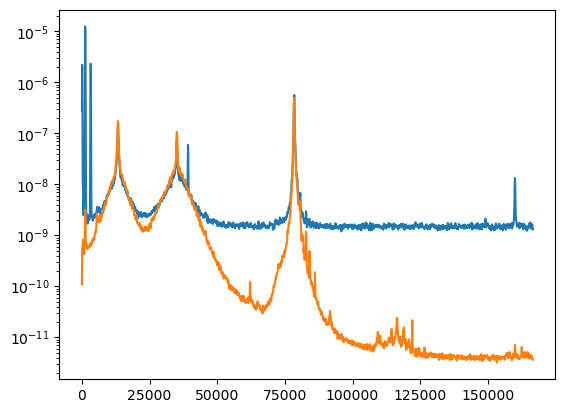

In [88]:
plt.plot(PSD[0], PSDsx[0])
plt.plot(PSD[0], PSDsf[0])
plt.yscale('log')

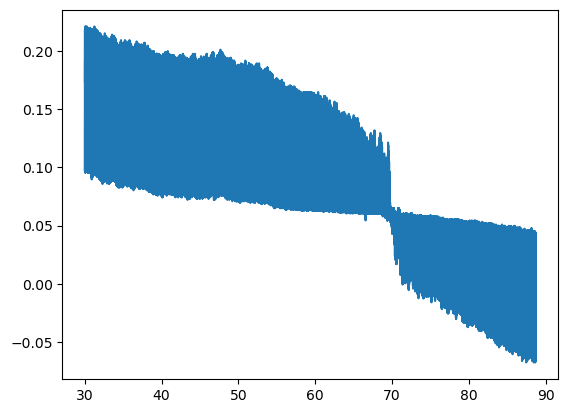

In [68]:
lb = 10000000
ub = 40000000
s = 1
time = np.linspace(0, Tinterval*len(tt[0][2]), len(tt[0][2]))
#plt.plot(tt[0][0][lb:ub:s])
#plt.plot(tt[0][1][lb:ub:s])
plt.plot(time[lb:ub:s], tt[0][2][lb:ub:s])

IndexError: index 1 is out of bounds for axis 0 with size 1

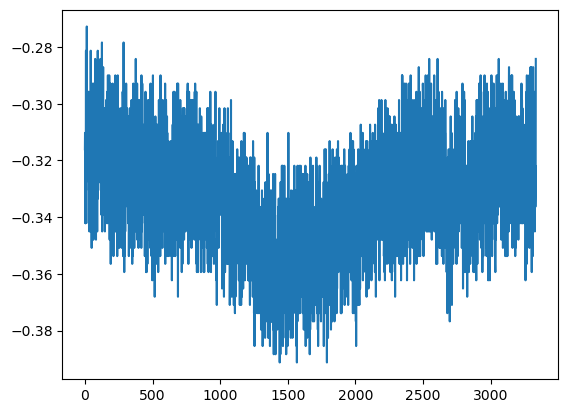

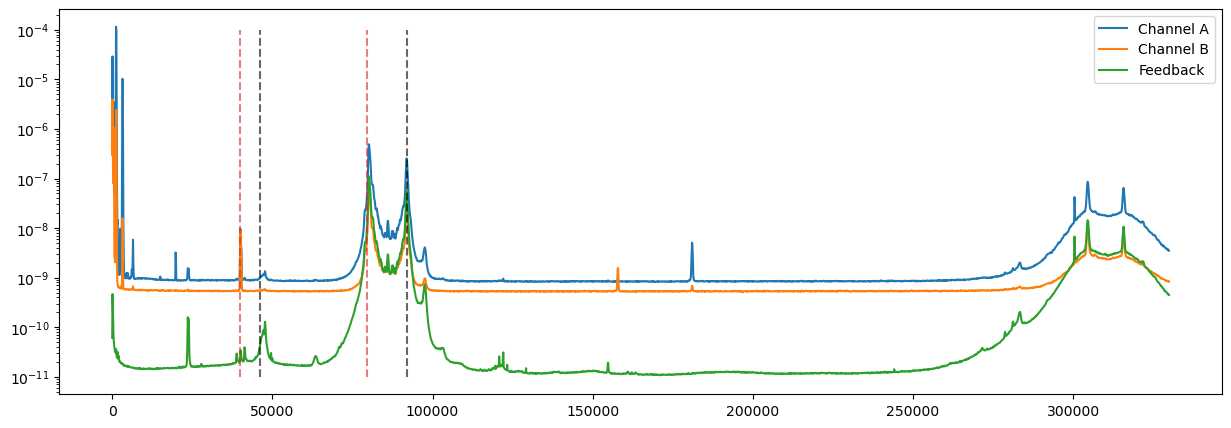

<Figure size 1500x500 with 0 Axes>

In [16]:
#plt.plot(tt[0][0][::10000])
#plt.plot(tt[0][1][::10000])
plt.plot(tt[0][2][::10000])

lb = 0
ub = 3300
f1 = 39800
f2 = 46000
f3 = 30500

plt.figure(figsize = (15, 5))
plt.plot(PSDs[0][0][0][lb:ub], PSDs[0][0][1][lb:ub], label = 'Channel A')
plt.plot(PSDs[0][1][0][lb:ub], PSDs[0][1][1][lb:ub], label = 'Channel B')
plt.plot(PSDs[0][2][0][lb:ub], PSDs[0][2][1][lb:ub], label = 'Feedback')
plt.plot([f1, f1], [10**(-11), 10**(-4)], '--', alpha = 0.6, color = 'tab:red')
plt.plot([2*f1, 2*f1], [10**(-11), 10**(-4)], '--', alpha = 0.6, color = 'tab:red')
plt.plot([f2, f2], [10**(-11), 10**(-4)], '--', alpha = 0.6, color = 'k')
plt.plot([2*f2, 2*f2], [10**(-11), 10**(-4)], '--', alpha = 0.6, color = 'k')
plt.yscale('log')
plt.legend()

plt.figure(figsize = (15, 5))
plt.plot(PSDs[1][0][0][lb:ub], PSDs[1][0][1][lb:ub], label = 'Channel A')
plt.plot(PSDs[1][1][0][lb:ub], PSDs[1][1][1][lb:ub], label = 'Channel B')
plt.plot(PSDs[1][2][0][lb:ub], PSDs[1][2][1][lb:ub], label = 'Feedback')
plt.plot([f1, f1], [10**(-11), 10**(-4)], '--', alpha = 0.6, color = 'tab:red')
plt.plot([2*f1, 2*f1], [10**(-11), 10**(-4)], '--', alpha = 0.6, color = 'tab:red')
plt.plot([f2, f2], [10**(-11), 10**(-4)], '--', alpha = 0.6, color = 'k')
plt.plot([2*f2, 2*f2], [10**(-11), 10**(-4)], '--', alpha = 0.6, color = 'k')
plt.yscale('log')
plt.legend()

plt.figure(figsize = (15, 5))
plt.plot(PSDs[2][0][0][lb:ub], PSDs[2][0][1][lb:ub], label = 'Channel A')
plt.plot(PSDs[2][1][0][lb:ub], PSDs[2][1][1][lb:ub], label = 'Channel B')
plt.plot(PSDs[2][2][0][lb:ub], PSDs[2][2][1][lb:ub], label = 'Feedback')
plt.plot([f1, f1], [10**(-11), 10**(-4)], '--', alpha = 0.6, color = 'tab:red')
plt.plot([2*f1, 2*f1], [10**(-11), 10**(-4)], '--', alpha = 0.6, color = 'tab:red')
plt.plot([f2, f2], [10**(-11), 10**(-4)], '--', alpha = 0.6, color = 'k')
plt.plot([2*f2, 2*f2], [10**(-11), 10**(-4)], '--', alpha = 0.6, color = 'k')
plt.plot([f3, f3], [10**(-11), 10**(-4)], '--', alpha = 0.6, color = 'magenta')
plt.plot([2*f3, 2*f3], [10**(-11), 10**(-4)], '--', alpha = 0.6, color = 'magenta')
plt.yscale('log')
plt.legend()



In [166]:
filepath = 'D:\\Experiment\\Cooling\\230817\\Pump Down\\tt ('
extensions = [str(i) + ').mat' for i in list(range(1, 651, 10))]
channels = ['A', 'B', 'H']

ttA = []
ttB = []
ttH = []
for extension in extensions:
        tts, Tinterval = load_data(filepath+extension, channels)
        ttA.append(tts[0][0])
        ttB.append(tts[1][0])
        ttH.append(tts[2][0])

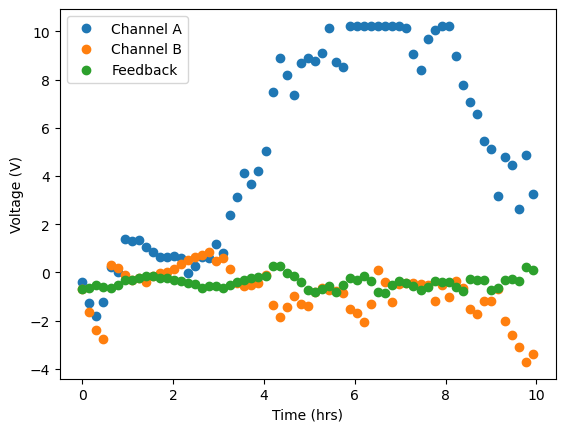

In [172]:
len(ttA)
time = np.linspace(0, 650*55, len(ttA))
plt.plot(time/3600, ttA, 'o', label = 'Channel A')
plt.plot(time/3600, ttB, 'o', label = 'Channel B')
plt.plot(time/3600, ttH, 'o', label = 'Feedback')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (hrs)')
plt.legend()

Still looks OK at this point, altough the y mode is not cooled very well

c:\Users\microspheres\anaconda3\envs\microspheres\Lib\site-packages\scipy\signal\_signaltools.py:3530: RuntimeWarning: invalid value encountered in subtract
  ret = data - np.mean(data, axis, keepdims=True)
c:\Users\microspheres\anaconda3\envs\microspheres\Lib\site-packages\scipy\signal\_spectral_py.py:1962: RuntimeWarning: invalid value encountered in multiply
  result = win * result


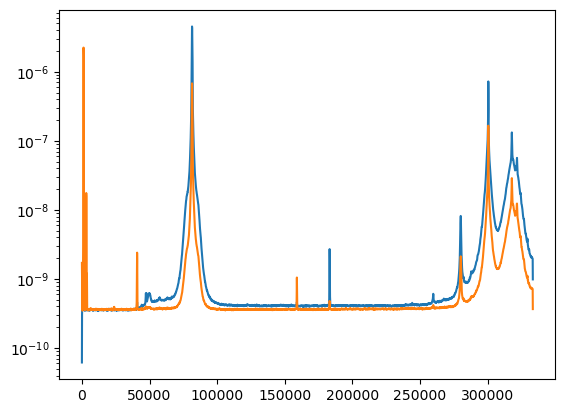

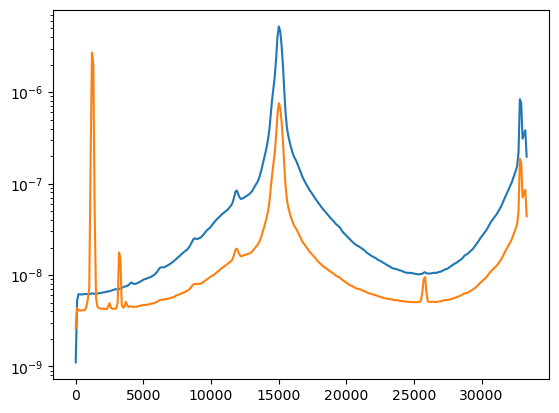

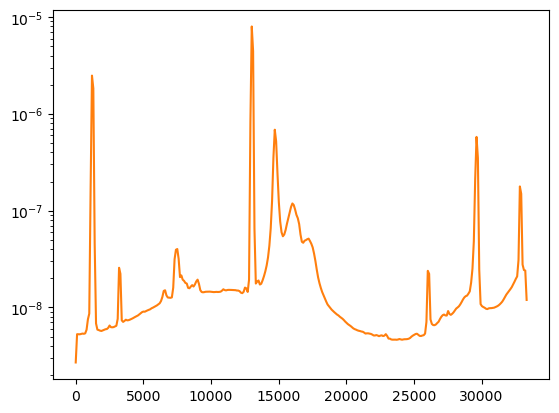

In [45]:
filepath = 'D:\\Experiment\\Cooling\\230815\\Pump Down\\tt ('
channels = ['A', 'B']

for i in range(100, 101):
    extensions = [f'{int(i)}).mat']
    PSDA, PSDB = make_PSDs(filepath, extensions, channels)

    plt.plot(PSDA[0][0], PSDA[0][1])
    plt.plot(PSDB[0][0], PSDB[0][1])
    plt.yscale('log')
plt.figure()
for i in range(108, 109):
    extensions = [f'{int(i)}).mat']
    PSDA, PSDB = make_PSDs(filepath, extensions, channels)

    plt.plot(PSDA[0][0], PSDA[0][1])
    plt.plot(PSDB[0][0], PSDB[0][1])
    plt.yscale('log')

plt.figure()
for i in range(121, 122):
    extensions = [f'{int(i)}).mat']
    PSDA, PSDB = make_PSDs(filepath, extensions, channels)

    plt.plot(PSDA[0][0], PSDA[0][1])
    plt.plot(PSDB[0][0], PSDB[0][1])
    plt.yscale('log')

Then we completely lost the x detection - the channel is saturated for some reason

69


c:\Users\microspheres\anaconda3\envs\microspheres\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\microspheres\anaconda3\envs\microspheres\Lib\site-packages\scipy\signal\_signaltools.py:3530: RuntimeWarning: invalid value encountered in subtract
  ret = data - np.mean(data, axis, keepdims=True)
c:\Users\microspheres\anaconda3\envs\microspheres\Lib\site-packages\scipy\signal\_spectral_py.py:1962: RuntimeWarning: invalid value encountered in multiply
  result = win * result


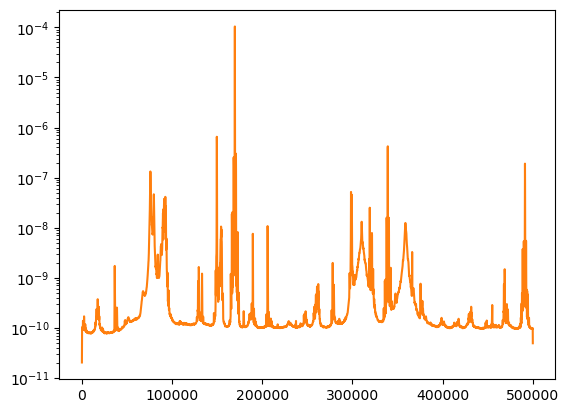

In [5]:
for i in range(69, 70):
    print(i)
    extensions = [f'{int(i)}).mat']
    PSDA, PSDB = make_PSDs(filepath, extensions, channels)

    plt.plot(PSDA[0][0], PSDA[0][1])
    plt.plot(PSDB[0][0], PSDB[0][1])
    plt.yscale('log')

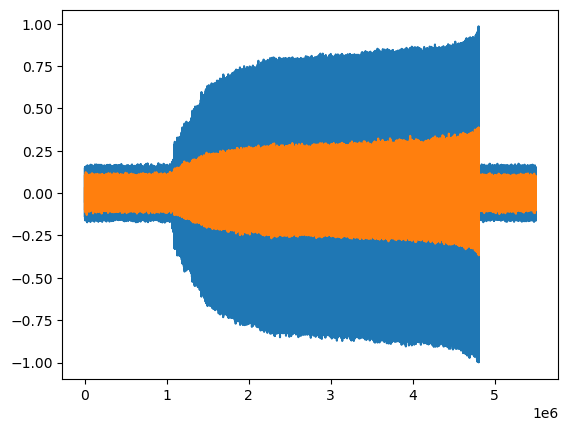

In [82]:
filepath = 'D:\\Experiment\\Cooling\\230815\\Pump Down\\tt ('
channels = ['A', 'B']
extension = '121).mat'

tts, Tinterval = load_data(filepath + extension, channels)

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.plot(tts[0][740*10**4:1290*10**4])
plt.plot(tts[1][740*10**4:1290*10**4])


In [63]:
50000*1*10**(-5)

0.5

Text(0, 0.5, 'Signal (V)')

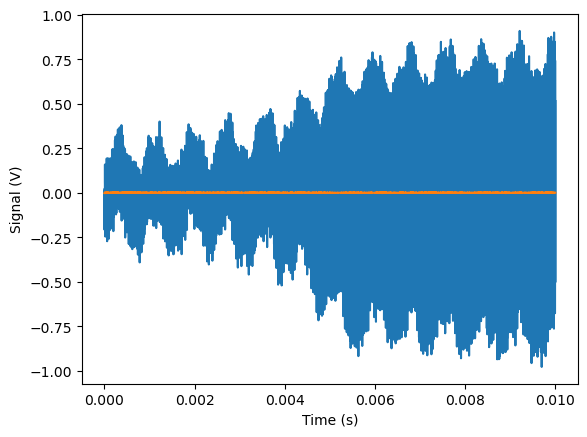

In [46]:
idx = int(3.001e7)
length = 10000

plt.plot(Tinterval * np.arange(length), tts[0][idx:idx+length])
plt.plot(Tinterval * np.arange(length), tts[1][idx:idx+length])

plt.xlabel('Time (s)')
plt.ylabel('Signal (V)')


Text(0, 0.5, 'Signal (V)')

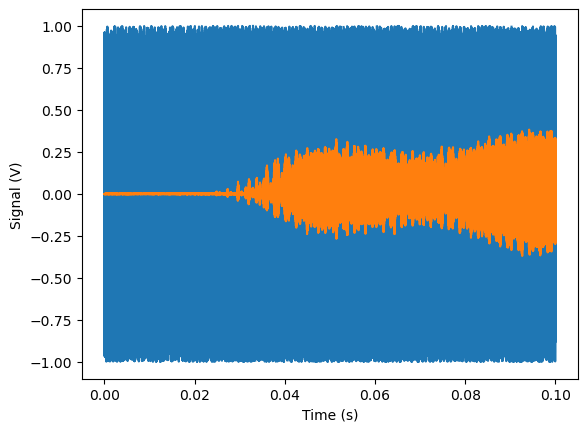

In [45]:
idx = int(3.01e7)
length = 100000

plt.plot(Tinterval * np.arange(length), tts[0][idx:idx+length])
plt.plot(Tinterval * np.arange(length), tts[1][idx:idx+length])

plt.xlabel('Time (s)')
plt.ylabel('Signal (V)')


Also worth noticing that the detection seems to be unstable at times (why aren't we seeing the y-motion?)

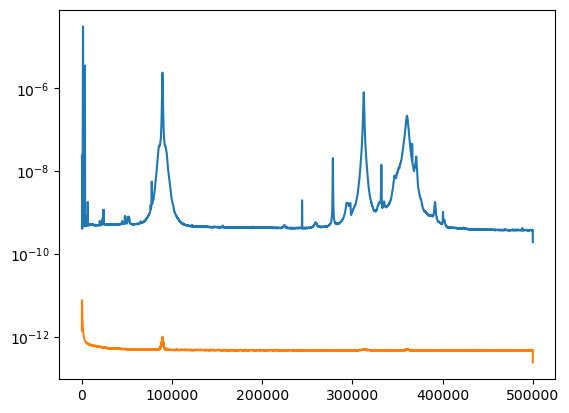

In [36]:
filepath = 'D:\\Experiment\\Cooling\\230814\\Pump Down\\tt ('
channels = ['A', 'B']

for i in range(88, 89):
    extensions = [f'{int(i)}).mat']
    PSDA, PSDB = make_PSDs(filepath, extensions, channels)

    plt.plot(PSDA[0][0], PSDA[0][1])
    plt.plot(PSDB[0][0], PSDB[0][1])
    plt.yscale('log')
